## Neural Network

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import Image
import sympy as sym
import handcalcs.render

## Part 1
### Create the Data

In [2]:
data = pd.DataFrame({'Drug Dosage': [0,0.1,0.2, 0.5,0.55,0.51, 0.9, 0.92],
                     'Drug Effectiveness':[0,0,0, 1,1,1, 0,0]})
data

,Drug Dosage,Drug Effectiveness
0,0.00,0
1,0.10,0
2,0.20,0
3,0.50,1
4,0.55,1
5,0.51,1
6,0.90,0
7,0.92,0


### To simplify, we assume that the parameters for the connections are correct
#### We use the output to feed into the activation function

In [3]:
w1 = -34.4
b1 = 2.14

np.array(range(0, 100, 1))/100 * w1 + b1

array([  2.14 ,   1.796,   1.452,   1.108,   0.764,   0.42 ,   0.076,
        -0.268,  -0.612,  -0.956,  -1.3  ,  -1.644,  -1.988,  -2.332,
        -2.676,  -3.02 ,  -3.364,  -3.708,  -4.052,  -4.396,  -4.74 ,
        -5.084,  -5.428,  -5.772,  -6.116,  -6.46 ,  -6.804,  -7.148,
        -7.492,  -7.836,  -8.18 ,  -8.524,  -8.868,  -9.212,  -9.556,
        -9.9  , -10.244, -10.588, -10.932, -11.276, -11.62 , -11.964,
       -12.308, -12.652, -12.996, -13.34 , -13.684, -14.028, -14.372,
       -14.716, -15.06 , -15.404, -15.748, -16.092, -16.436, -16.78 ,
       -17.124, -17.468, -17.812, -18.156, -18.5  , -18.844, -19.188,
       -19.532, -19.876, -20.22 , -20.564, -20.908, -21.252, -21.596,
       -21.94 , -22.284, -22.628, -22.972, -23.316, -23.66 , -24.004,
       -24.348, -24.692, -25.036, -25.38 , -25.724, -26.068, -26.412,
       -26.756, -27.1  , -27.444, -27.788, -28.132, -28.476, -28.82 ,
       -29.164, -29.508, -29.852, -30.196, -30.54 , -30.884, -31.228,
       -31.572, -31.

### Activation Function 
#### input the data into the hidden layer
#### This case is the softplus function

In [4]:
Image(url= "NN Activation Function.png", width=700, height=900)

In [5]:
w2 = -1.3
out1 = np.log(1 + np.exp(np.array(range(0, 100, 1))/100 * w1 + b1)) * w2
out1

array([-2.92660238e+00, -2.53440979e+00, -2.16104625e+00, -1.81134641e+00,
       -1.49032107e+00, -1.20254809e+00, -9.51429709e-01, -7.38527972e-01,
       -5.63227963e-01, -4.22872729e-01, -3.13310990e-01, -2.29636585e-01,
       -1.66875837e-01, -1.20473035e-01, -8.65436467e-02, -6.19421597e-02,
       -4.42150642e-02, -3.14997557e-02, -2.24095699e-02, -1.59265526e-02,
       -1.13108908e-02, -8.02875900e-03, -5.69693104e-03, -4.04129343e-03,
       -2.86628545e-03, -2.03264450e-03, -1.44132832e-03, -1.02196419e-03,
       -7.24582860e-04, -5.13719415e-04, -3.64211498e-04, -2.58210594e-04,
       -1.83058251e-04, -1.29777949e-04, -9.20046791e-05, -6.52254504e-05,
       -4.62405462e-05, -3.27814306e-05, -2.32397897e-05, -1.64754021e-05,
       -1.16799107e-05, -8.28023739e-06, -5.87010526e-06, -4.16149016e-06,
       -2.95020213e-06, -2.09148433e-06, -1.48271409e-06, -1.05113908e-06,
       -7.45182992e-07, -5.28281824e-07, -3.74514289e-07, -2.65504025e-07,
       -1.88223489e-07, -

In [6]:
w3 = -2.52
b2 = 1.29
w4 = 2.28


out2 = np.log(1 + np.exp(np.array(range(0, 100, 1))/100 * -2.52 + 1.29)) * 2.28
out2

array([3.49560146, 3.45067062, 3.40598836, 3.36155818, 3.31738357,
       3.27346803, 3.22981503, 3.18642802, 3.14331046, 3.10046576,
       3.05789732, 3.01560851, 2.97360269, 2.93188316, 2.89045322,
       2.84931609, 2.80847499, 2.76793308, 2.72769348, 2.68775925,
       2.64813341, 2.60881893, 2.5698187 , 2.53113557, 2.49277232,
       2.45473167, 2.41701626, 2.37962867, 2.34257139, 2.30584685,
       2.2694574 , 2.23340528, 2.19769268, 2.16232167, 2.12729427,
       2.09261236, 2.05827776, 2.02429218, 1.99065724, 1.95737445,
       1.92444521, 1.89187083, 1.85965252, 1.82779136, 1.79628833,
       1.76514431, 1.73436006, 1.70393623, 1.67387336, 1.64417187,
       1.61483206, 1.58585414, 1.55723818, 1.52898414, 1.50109188,
       1.47356112, 1.4463915 , 1.41958252, 1.39313356, 1.36704392,
       1.34131276, 1.31593914, 1.29092201, 1.26626021, 1.24195248,
       1.21799744, 1.19439363, 1.17113946, 1.14823327, 1.12567328,
       1.10345762, 1.08158433, 1.06005136, 1.03885657, 1.01799

In [7]:
pred = out1 + out2 - 0.58
pred

array([-0.01100092,  0.33626083,  0.66494211,  0.97021176,  1.2470625 ,
        1.49091994,  1.69838532,  1.86790005,  2.0000825 ,  2.09759303,
        2.16458633,  2.20597193,  2.22672685,  2.23141013,  2.22390957,
        2.20737393,  2.18425993,  2.15643333,  2.12528391,  2.0918327 ,
        2.05682252,  2.02079017,  1.98412176,  1.94709427,  1.90990603,
        1.87269902,  1.83557493,  1.7986067 ,  1.76184681,  1.72533313,
        1.68909319,  1.65314707,  1.61750962,  1.58219189,  1.54720226,
        1.51254713,  1.47823152,  1.4442594 ,  1.410634  ,  1.37735797,
        1.34443353,  1.31186255,  1.27964665,  1.24778719,  1.21628538,
        1.18514222,  1.15435858,  1.12393518,  1.09387262,  1.06417134,
        1.03483169,  1.00585387,  0.97723799,  0.948984  ,  0.92109178,
        0.89356106,  0.86639145,  0.83958248,  0.81313354,  0.78704391,
        0.76131275,  0.73593913,  0.71092201,  0.68626021,  0.66195248,
        0.63799744,  0.61439363,  0.59113946,  0.56823327,  0.54

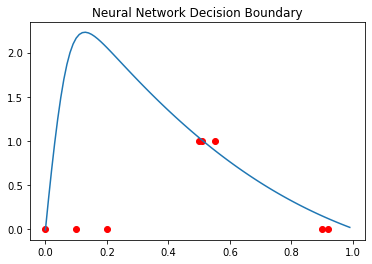

In [8]:
plt.title('Neural Network Decision Boundary')
plt.plot(np.array(range(0, 100, 1))/100, pred)
plt.scatter(data['Drug Dosage'], data['Drug Effectiveness'], c = 'red')
plt.show()

## Part 2

### Use Gradient Descent to optimize the $\beta_3$

In [9]:
data = pd.DataFrame({'Drug Dosage': [0,0.5,1],
                     'Drug Effectiveness':[0,1,0]})
data

,Drug Dosage,Drug Effectiveness
0,0.0,0
1,0.5,1
2,1.0,0


In [10]:
w1 = 3.34
b1 = -1.43
w2 = -1.22
b3 = 0

out1 = np.log(1 + np.exp(np.array(range(0, 100, 1))/100 * w1 + b1)) * w2  + b3
out1

array([-0.26175576, -0.2697309 , -0.27792245, -0.28633478, -0.29497226,
       -0.30383926, -0.31294015, -0.3222793 , -0.33186105, -0.34168973,
       -0.35176966, -0.3621051 , -0.37270029, -0.38355943, -0.39468667,
       -0.40608611, -0.41776178, -0.42971764, -0.44195759, -0.45448544,
       -0.46730492, -0.48041966, -0.49383319, -0.50754895, -0.52157025,
       -0.53590029, -0.55054214, -0.56549875, -0.58077292, -0.59636732,
       -0.61228447, -0.62852673, -0.64509632, -0.66199527, -0.67922548,
       -0.69678866, -0.71468634, -0.73291988, -0.75149046, -0.77039908,
       -0.78964655, -0.80923351, -0.82916038, -0.84942742, -0.87003469,
       -0.89098205, -0.91226919, -0.9338956 , -0.95586059, -0.97816326,
       -1.00080256, -1.02377724, -1.04708587, -1.07072684, -1.0946984 ,
       -1.11899858, -1.14362528, -1.16857624, -1.19384903, -1.21944108,
       -1.24534966, -1.27157192, -1.29810487, -1.32494538, -1.35209022,
       -1.37953602, -1.40727932, -1.43531654, -1.46364402, -1.49

In [11]:
w3 = -3.53
b2 = 0.57
w4 = -2.3

out2 = np.log(1 + np.exp(np.array(range(0, 100, 1))/100 * w3 + b2)) * w4 + b3
out2

array([-2.34190948, -2.29038002, -2.23951817, -2.18932991, -2.13982088,
       -2.09099638, -2.04286131, -1.9954202 , -1.94867721, -1.90263608,
       -1.85730012, -1.81267227, -1.768755  , -1.72555036, -1.68305999,
       -1.64128505, -1.60022629, -1.55988398, -1.52025798, -1.48134768,
       -1.44315202, -1.40566953, -1.36889828, -1.33283589, -1.2974796 ,
       -1.26282618, -1.22887202, -1.19561309, -1.16304497, -1.13116286,
       -1.09996157, -1.06943558, -1.03957899, -1.01038558, -0.98184882,
       -0.95396185, -0.92671754, -0.90010847, -0.87412695, -0.84876507,
       -0.82401468, -0.7998674 , -0.77631468, -0.75334777, -0.73095776,
       -0.70913559, -0.68787206, -0.66715787, -0.64698361, -0.62733976,
       -0.60821676, -0.58960497, -0.57149471, -0.55387628, -0.53673994,
       -0.52007597, -0.50387463, -0.48812621, -0.47282104, -0.45794948,
       -0.44350193, -0.42946887, -0.41584083, -0.40260842, -0.38976235,
       -0.3772934 , -0.36519246, -0.35345053, -0.34205871, -0.33

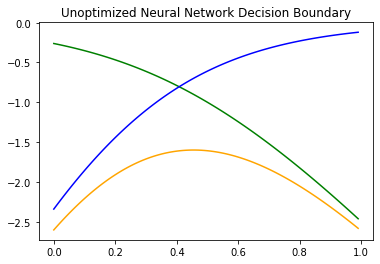

In [12]:
plt.title('Unoptimized Neural Network Decision Boundary')
plt.plot(np.array(range(0, 100, 1))/100, out1, c = 'green')
plt.plot(np.array(range(0, 100, 1))/100, out2, c='blue')
plt.plot(np.array(range(0, 100, 1))/100, out1+out2, c='orange')
plt.show()

In [13]:
pred = out1 + out2
residual = np.array([0-pred[0], 1-pred[49], 0-pred[99]])
residual

array([2.60366524, 2.60550302, 2.58352217])

In [14]:
%%render

SSR = residual**2
SSR=SSR.sum()
SSR

<IPython.core.display.Latex object>

In [15]:
pred = out1 + out2 + 1
residual = np.array([0-pred[0], 1-pred[49], 0-pred[99]])
residual

array([1.60366524, 1.60550302, 1.58352217])

In [16]:
%%render


SSR = residual**2
SSR=SSR.sum()
SSR

<IPython.core.display.Latex object>

In [17]:
pred = out1 + out2 + 2
residual = np.array([0-pred[0], 1-pred[49], 0-pred[99]])
print(residual)


[0.60366524 0.60550302 0.58352217]


In [18]:
%%render


SSR = residual**2
SSR=SSR.sum()
SSR

<IPython.core.display.Latex object>

In [19]:
pred = out1 + out2 + 3
residual = np.array([0-pred[0], 1-pred[49], 0-pred[99]])
print(residual)


[-0.39633476 -0.39449698 -0.41647783]


In [20]:
%%render


SSR = residual**2
SSR=SSR.sum()
SSR

<IPython.core.display.Latex object>

In [21]:
x, y, z, w = sym.symbols('x y z w')

f = (0 - x)**2 + (1 - x)**2 + (0 - x)**2 

sym.diff(f, x)

6*x - 2

In [22]:
slop = -2 * (0 - -2.60366524)*1 + -2 *(1-  -1.60550302)*1 + -2 * (0 - -2.58352217)*1
learning_rate = 0.1 
step_size = learning_rate * slop
print(step_size)

old_beta = 0
new_beta = old_beta - step_size
old_beta = new_beta
new_beta

-1.5585380860000002


1.5585380860000002

In [23]:
pred = out1 + out2 + new_beta

slop = -2 * (0 - pred[0])*1 + -2 *(1-  pred[49])*1 + -2 * (0 - pred[99])*1

learning_rate = 0.1 
step_size = learning_rate * slop
print(step_size)


new_beta = old_beta - step_size
old_beta = new_beta
new_beta

-0.6234152347360036


2.181953320736004

In [24]:
pred = out1 + out2 + new_beta

slop = -2 * (0 - pred[0])*1 + -2 *(1-  pred[49])*1 + -2 * (0 - pred[99])*1

learning_rate = 0.1 
step_size = learning_rate * slop
print(step_size)


new_beta = old_beta - step_size
old_beta = new_beta
new_beta

-0.24936609389440131


2.4313194146304054

### We continue to optimize the $\beta_3$ until the step size closes to zero

In [38]:
w1 = 3.34
b1 = -1.43
w2 = 0.36
b3 = 0

out1 = np.log(1 + np.exp(np.array(range(0, 100, 1))/100 * w1 + b1)) * w2  + b3
out1

array([0.07723941, 0.07959272, 0.0820099 , 0.08449223, 0.08704099,
       0.08965749, 0.092343  , 0.09509881, 0.09792621, 0.10082648,
       0.10380088, 0.10685068, 0.10997713, 0.11318147, 0.11646492,
       0.11982869, 0.12327397, 0.12680193, 0.13041371, 0.13411046,
       0.13789325, 0.14176318, 0.14572127, 0.14976854, 0.15390597,
       0.15813451, 0.16245506, 0.16686848, 0.17137561, 0.17597724,
       0.1806741 , 0.1854669 , 0.19035629, 0.19534287, 0.20042719,
       0.20560977, 0.21089105, 0.21627144, 0.22175128, 0.22733088,
       0.23301046, 0.23879022, 0.24467028, 0.25065071, 0.25673155,
       0.26291274, 0.26919419, 0.27557575, 0.28205722, 0.28863834,
       0.29531879, 0.3020982 , 0.30897616, 0.31595218, 0.32302576,
       0.3301963 , 0.3374632 , 0.34482578, 0.35228332, 0.35983507,
       0.36748023, 0.37521794, 0.38304734, 0.39096749, 0.39897744,
       0.4070762 , 0.41526275, 0.42353603, 0.43189496, 0.44033842,
       0.44886529, 0.45747441, 0.46616461, 0.47493467, 0.48378

In [39]:
w3 = -3.53
b2 = 0.57
w4 = 0.63

out2 = np.log(1 + np.exp(np.array(range(0, 100, 1))/100 * w3 + b2)) * w4 + b3
out2

array([0.64147955, 0.62736496, 0.61343324, 0.59968602, 0.58612485,
       0.57275118, 0.55956636, 0.54657162, 0.53376811, 0.52115684,
       0.50873873, 0.49651458, 0.48448506, 0.47265075, 0.46101208,
       0.44956938, 0.43832285, 0.42727257, 0.41641849, 0.40576045,
       0.39529816, 0.38503122, 0.37495909, 0.36508114, 0.35539659,
       0.34590456, 0.33660408, 0.32749402, 0.31857319, 0.30984026,
       0.30129382, 0.29293235, 0.28475424, 0.27675779, 0.2689412 ,
       0.26130259, 0.25384002, 0.24655145, 0.23943477, 0.23248782,
       0.22570837, 0.21909411, 0.21264272, 0.20635178, 0.20021886,
       0.19424149, 0.18841713, 0.18274324, 0.17721725, 0.17183654,
       0.1665985 , 0.16150049, 0.15653986, 0.15171394, 0.14702007,
       0.14245559, 0.13801783, 0.13370414, 0.12951185, 0.12543834,
       0.12148096, 0.11763713, 0.11390423, 0.1102797 , 0.10676099,
       0.10334558, 0.10003098, 0.09681471, 0.09369434, 0.09066747,
       0.08773173, 0.08488477, 0.08212429, 0.07944804, 0.07685

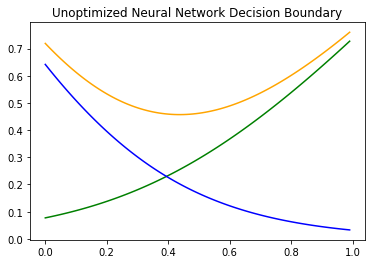

In [27]:
plt.title('Unoptimized Neural Network Decision Boundary')
plt.plot(np.array(range(0, 100, 1))/100, out1, c = 'green')
plt.plot(np.array(range(0, 100, 1))/100, out2, c='blue')
plt.plot(np.array(range(0, 100, 1))/100, out1+out2, c='orange')
plt.show()

In [40]:
pred = out1 + out2
residual = np.array([0-pred[0], 1-pred[50], 0-pred[99]])
residual

array([-0.71871896,  0.53808271, -0.7598049 ])

In [29]:
%%render

SSR = (residual**2).sum()
SSR=SSR.sum()


<IPython.core.display.Latex object>

In [48]:
out1 = np.log(1 + np.exp(np.array(range(0, 101, 50))/100 * w1 + b1)) + b3

out2 = np.log(1 + np.exp(np.array(range(0, 101, 50))/100 * w3 + b2)) + b3


In [44]:
out1, out2

(array([0.2145539 , 0.82032997, 2.04809132]),
 array([1.01822151, 0.26444207, 0.05052097]))

In [45]:
%%render

pred = out1 * w1 + out2 * w3 +b1

<IPython.core.display.Latex object>

In [60]:
learning_rate = 0.1
gradient1 = (-2 * residual*out1).sum()
gradient2 = (-2 * residual*out2).sum()
gradient3 = (-2 * residual).sum()

In [64]:
print(gradient1, gradient2, gradient3)

2.537896831286016 1.2558189539841742 1.8808823060778417


In [65]:
print(gradient1 * learning_rate)
print(gradient2 * learning_rate)
print(gradient3 * learning_rate)

0.2537896831286016
0.12558189539841744
0.18808823060778418
